## **Time series analysis on vegetable prices**

In this analysis we will determine what factors contribute to the fluctuation in prices of vegetable prices for:

 <a href="#bhindi">Bhindi</a>
, <a href="#tomatos">Tomato</a>
, <a href="#onions">Onion</a>
, <a href="#potatos">Potato</a>
, <a href="#brinjal">Brinjal</a>
, <a href="#garlic">Garlic</a>
, <a href="#peas">Peas</a>
, <a href="#green chilli">Green Chilli</a>
, <a href="#elephant yams">Elephant Yams</a>


We will consider factors such as:
1) If seasons contribute to vegetable prices, (month of the year)?
2) What region of the world the vegetable comes from?
3) If specific vegetables are bought more frequently than others?
4) What do the prices have in common with the vegetable type and what does it mean?

**1) Data Import**

In [16]:
#Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp
import datetime as dt

#attain vegetable_pricesset from file path
vegetable_prices = pd.read_csv('./dataset/prices.csv')

#test dataset for established connection
vegetable_prices.head()


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


**Univariate analysis**

In [17]:
#Lets dentify the type of data we are dealing with in the dataframe:
vegetable_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


**2 Data format:**

1) lets format the data to a float datatype sice we will be dealing with pricing

In [18]:
#Method to convert datatypes in dataframe to float:
def convert_data_type(list_of_columns):
    for column in list_of_columns:
        vegetable_prices[column] = vegetable_prices[column].apply(float)

#List of columns we want to convert their datatypes:
list_of_columns = vegetable_prices.columns.to_list()[1:]

convert_data_type(list_of_columns)
vegetable_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    float64
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    float64
 5   Brinjal                 287 non-null    float64
 6   Garlic                  287 non-null    float64
 7   Peas                    287 non-null    float64
 8   Methi                   287 non-null    float64
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    float64
dtypes: float64(10), object(1)
memory usage: 24.8+ KB


Here we will convert the datatype of the date object into a date object so we can convet it into quarters, to make analyzing for changes in trends easier 

In [19]:
#convert datatype of date column: 
vegetable_prices['Price Dates'] = pd.to_datetime(vegetable_prices['Price Dates'],format='mixed')

#create date column that splits dates into quarters, so we can have our quartery preformance (seasonal):
vegetable_prices['quarter'] = vegetable_prices['Price Dates'].dt.to_period('Q')

#Drop date column as it will not be needed in the dataframe:
quarter_preformance=vegetable_prices.drop('Price Dates',axis=1)

quarter_preformance.set_index('quarter')

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0
2023Q1,35.0,16.0,22.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0
2023Q1,35.0,16.0,21.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0
2023Q2,30.0,16.0,21.0,22.0,25.0,55.0,25.0,7.0,40.0,25.0
2023Q3,35.0,16.0,20.0,21.0,25.0,55.0,22.0,6.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...,...
2023Q4,45.0,16.0,30.0,20.0,70.0,260.0,40.0,16.0,40.0,25.0
2023Q4,45.0,16.0,30.0,20.0,70.0,260.0,30.0,20.0,45.0,25.0
2023Q4,45.0,16.0,30.0,22.0,80.0,260.0,30.0,18.0,50.0,25.0


Let us understand our data a bit more to know what we are dealing with

## *Bhindi*  <img src="./assets/Bhindi (Ladies finger).jpg" alt="Bhindi image" width="350" height="250">

What is Bhindi?

Bhindi, *also known as okra or lady's fingers*, is a flowering plant in the mallow family. It is valued for its edible green seed pods.

Where is it commonly found?

**Bhindi is cultivated in tropical, subtropical, and warm temperate** regions worldwide. It is a popular vegetable in many cuisines, including Indian, African, Middle Eastern, and Caribbean.

Major exporting country:

India is the top exporter of fresh okra globally.

Fun fact:

Nutritional value: Okra is a good source of vitamins, minerals, and fiber.
Culinary uses: Okra is used in various dishes, including stews, soups, curries, and stir-fries. It can be fried, boiled, steamed, or pickled.

## *Tomatos*  <img src="./assets/Tomato.jpg" alt="Tomatos image" width="350" height="300">

What are Tomatoes?

Tomatoes are the edible berries of the plant Solanum lycopersicum, commonly known as a tomato plant. They are native to South America and are now grown worldwide.

Where are they commonly found?

**Tomatoes are cultivated in a warm, sunny climates**. Major producing regions include China, India, the United States, Turkey, and Egypt.

Major exporting country:

Mexico is the world's leading exporter of tomatoes, primarily supplying the United States market.

Fun fact:

Types: There are various tomato varieties, including beefsteak, cherry, grape, Roma, and heirloom tomatoes, each with unique characteristics.
Nutritional value: Tomatoes are rich in vitamins (especially vitamin C and K), minerals, and antioxidants like lycopene.
Culinary uses: Tomatoes are incredibly versatile, used in salads, sauces, soups, sandwiches, and many other dishes. They can be eaten raw, cooked, or processed into products like ketchup and juice.

## *Onions*  <img src="./assets/Onion.jpg" alt="Onions image" width="350" height="300">

What are Onions?

Onions are a vegetable and are part of the allium family, which also includes garlic, shallots, chives, and leeks. Onions are grown worldwide and can be eaten raw or cooked. They have a pungent flavor and aroma that is due to sulfur compounds present in the onion.

Where are they commonly found?

Onions are cultivated globally, with major producing regions including China, India, the United States, and Egypt. They can be grown in a variety of climates but **thrive in areas with moderate temperatures and well-drained soil**.

Major exporting country:

The Netherlands is the world's leading exporter of onions, renowned for its large-scale onion production and efficient distribution networks.

Fun fact:

Nutritional value: Onions are a good source of vitamins (especially vitamin C), minerals, and antioxidants.
Culinary uses: Onions are a fundamental ingredient in countless cuisines, used as a base for flavor in soups, stews, stir-fries, and many other dishes. They can be caramelized, roasted, pickled, or eaten raw in salads.

## *Potatos*  <img src="./assets/Potato.jpg" alt="Potatos image" width="350" height="300">

What are Potatoes?

Potatoes are starchy, tuberous crops from the perennial nightshade Solanum tuberosum. They are native to the Andes Mountains of South America and are now a staple food in many parts of the world.

Where are they commonly found?

Potatoes are cultivated globally, **thriving in cool climates with well-drained soil.** Major producing regions include China, India, Russia, Ukraine, and the United States.

Major exporting country:

The Netherlands and France are among the leading exporters of fresh potatoes and potato products worldwide.

Fun fact:

Nutritional value: Potatoes are a good source of carbohydrates, dietary fiber, vitamin C, and potassium.
Culinary uses: Potatoes are incredibly versatile, used in countless dishes, including mashed potatoes, french fries, baked potatoes, potato salads, and soups. They can be boiled, fried, baked, roasted, or steamed.

## *Brinjal*  <img src="./assets/Brinjal.jpg" alt="Brinjal image" width="350" height="300">

What is Brinjal?

Brinjal, also known as eggplant or aubergine, is a plant species in the nightshade family. It's cultivated for its edible fruit, which is technically a berry.

Where is it commonly found?

**Brinjal is grown in tropical and subtropical regions worldwide.** Leading producers include China, India, Egypt, Turkey, and Iran. It prefers warm weather and well-drained soil.

Major exporting country:

While India and China produce the most brinjal, the Netherlands and Spain are significant exporters to European markets. Mexico also plays a role in exporting to North America. The European market seeks more exotic and non-European varieties.

Fun fact:

Nutritional value: Brinjal is a good source of dietary fiber, vitamins, and minerals, particularly antioxidants like nasunin (found in the purple skin).
Culinary uses: Brinjal is versatile and used in numerous cuisines. It's often used in stir-fries, curries, dips (like baba ghanoush), and can be grilled, roasted, or fried.

## *Garlic*  <img src="./assets/Garlic.jpg" alt="Garlic image" width="350" height="300">

What is Garlic?

Garlic is a species in the onion genus, Allium. It is a widely used culinary ingredient known for its pungent flavor and aroma. Garlic has been used for both culinary and medicinal purposes for centuries.

Where is it commonly found?

Garlic is cultivated globally, **thriving in temperate (moderate) climates**. Major garlic-producing regions include China, India, Spain, the United States, and Egypt.

Major exporting country:

China is the world's leading exporter of garlic, followed by Spain and Argentina.

Fun fact:

Nutritional value: Garlic is a good source of vitamins (especially vitamin C and B6), minerals (like manganese and selenium), and antioxidants.
Culinary uses: Garlic is a fundamental ingredient in countless cuisines, used to flavor dishes such as stir-fries, sauces, soups, and roasted meats. It can be used fresh, minced, crushed, or roasted.

## *Peas*  <img src="./assets/Peas.jpg" alt="Peas image" width="350" height="300">

What are Peas?

Peas are the small, spherical seeds of the pod fruit Pisum sativum. They are a popular vegetable, belonging to the legume family.

Where are they commonly found?

Peas are cultivated globally, **thriving in cool, temperate(moderate) climates.** Major pea-producing regions include Canada, Russia, China, India, and the United States.

Major exporting country:

Canada is the world's leading exporter of peas, particularly dry peas, followed by the United States and Russia. Guatemala is a major exporter of fresh peas.

Fun fact:

Types: There are various types of peas, including garden peas (shelled or eaten as whole pods), snow peas (eaten with their flat pods), and snap peas (eaten with their edible pods).
Nutritional value: Peas are a good source of protein, dietary fiber, vitamins (especially vitamin K and A), and minerals (like iron and manganese).
Culinary uses: Peas are versatile and used in numerous cuisines. They can be added to soups, stews, stir-fries, salads, or eaten as a side dish. They can also be processed into products like frozen peas and pea protein.


## *Methi*  <img src="./assets/Methi.jpg" alt="Methi image" width="350" height="300">

What is Methi?

Methi, commonly known as fenugreek, is an annual plant in the family Fabaceae. It is cultivated worldwide as a semi-arid crop. Its leaves and seeds are common ingredients in dishes from the Indian subcontinent and have been used as a culinary ingredient since ancient times.

Where is it commonly found?

Methi is cultivated in many parts of the world, including India, the Middle East, North Africa, and parts of Europe. It thrives in dry and semi-arid climates.

Major exporting country:

India is the largest producer and exporter of fenugreek seeds globally. Rajasthan, in particular, is a major fenugreek-producing state in India.

Fun fact:

Uses: Methi is used both as a herb (leaves) and a spice (seeds). It has a slightly bitter taste and a distinctive aroma.
Culinary uses: The leaves are often used in Indian curries, stir-fries, and flatbreads. The seeds are used as a spice in various cuisines, often roasted or ground.
Nutritional Value: Fenugreek is a good source of fiber, protein, and various minerals. It is also believed to have several health benefits, although more research is needed in this area.

## *Green Chilli*  <img src="./assets/Green Chilli.jpg" alt="Green Chilli image" width="350" height="300">

What is Green Chilli?

Green chillies are the unripe fruits of the Capsicum species, belonging to the nightshade family. They are a common ingredient in many cuisines, prized for their spicy heat and vibrant flavor.

Where are they commonly found?

Green chillies are cultivated in tropical and subtropical regions worldwide. Leading producers include India, China, Mexico, Turkey, and Indonesia.

Major exporting country:

India is the world's leading exporter of green chillies, with significant markets in the Middle East, Southeast Asia, and Europe. Mexico is also a major exporter, primarily to the United States.

Fun fact:

Varieties: Green chillies come in numerous varieties, varying in size, shape, heat level, and flavor profiles. Some popular types include Serrano, Jalapeño, Thai, and Bird's Eye chillies.
Nutritional value: Green chillies are a good source of vitamin C, antioxidants, and capsaicin (the compound responsible for their heat).
Culinary uses: Green chillies are widely used in various cuisines, adding spice and flavor to dishes such as curries, stir-fries, salsas, and sauces. They can be used fresh, pickled, or dried.


## *Elephant Yam (Suran)*  <img src="./assets/Elephant Yam (Suran).jpg" alt="Elephant Yam image" width="350" height="300">

What is Elephant Yam (Suran)?

Elephant Yam, also known as Suran or Jimikand, is a tropical tuber crop belonging to the Araceae family. It is cultivated for its large, starchy corm, which is a popular ingredient in many cuisines.

Where is it commonly found?

Elephant Yam is primarily grown in tropical and subtropical regions of Asia, Africa, and the Pacific Islands. Major producing countries include India, China, Indonesia, Nigeria, and the Philippines.

Major exporting country:

While precise export data is limited, India is likely a significant exporter of Elephant Yam, given its large-scale cultivation. However, exports may be primarily focused on processed or value-added products derived from the yam.

Fun fact:

Characteristics: Elephant Yam has a large, brown, rough-textured corm with white or cream-colored flesh. It has a distinct, somewhat pungent flavor that mellows upon cooking.
Nutritional value: Elephant Yam is a good source of carbohydrates, dietary fiber, vitamins (especially vitamin B6), and minerals (like potassium and magnesium).
Culinary uses: Elephant Yam is used in various cuisines, commonly boiled, fried, or roasted. It is often added to curries, stews, soups, and stir-fries. In some cultures, it is also used to make desserts and snacks.

**3 Determine measures of central tendency in the data:**

lets determin the the mean, median and mode in the data:

In [20]:

quarter_average_price= quarter_preformance.groupby('quarter').mean().round(2)
quarter_middle_price= quarter_preformance.groupby('quarter').median()

#Lambda metod to determin mode in quarters
quarter_common_price_method = lambda x:x.mode()

#Apply method to grouped dataframe then set index to quarter column
quarter_common_price = quarter_preformance.groupby('quarter').apply(quarter_common_price_method).set_index('quarter')

/tmp/ipykernel_1784/2925232391.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarter_common_price = quarter_preformance.groupby('quarter').apply(quarter_common_price_method).set_index('quarter')


In [21]:
quarter_average_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,32.88,16.03,15.05,16.44,30.09,89.41,47.18,10.22,42.71,27.50
2023Q2,26.20,16.00,14.85,18.89,29.22,107.57,66.32,14.04,44.92,26.65
2023Q3,25.58,16.00,21.10,19.14,29.49,146.88,81.35,13.04,47.43,31.26
2023Q4,32.99,16.00,31.16,19.73,37.32,182.97,70.96,43.11,41.22,29.73
2024Q1,45.00,16.00,9.00,18.00,50.00,260.00,40.00,15.00,60.00,25.00


In [22]:
quarter_middle_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,33.00,16.0,12.0,15.0,25.0,80.0,30.0,8.0,40.0,30.0
2023Q2,27.00,16.0,12.5,20.0,25.0,95.0,60.0,15.0,40.0,25.0
2023Q3,24.25,16.0,22.0,20.0,30.0,160.0,75.0,12.0,40.0,30.0
2023Q4,32.00,16.0,30.0,20.0,32.5,170.0,60.0,15.0,40.0,30.0
2024Q1,45.00,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.0,25.0


**Using the Average and the Median we can confirm the valuation of the vegetables throughout the quarters:**

1) Clearly tomato prices haven't had much variance in price over the last 4 quarters, *indicating a stagnation in their economy*.
2) The price of Brinjal ,Garlic and Peas was over valued in some regions. We see this by observing if the average price is greater than the median price.

**Using the Time frame as analysis:**

1) we can see that onions and peas had a massive increase in demand in the third and fourth quarter of the year,
3) The 2024 Quarter shows no change meaning the data set is most probably composed of 1-2 months, we can ignore them.
   

In [23]:
quarter_common_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,32.0,16.0,11.0,14.0,25.0,80.0,30.0,7.0,40.0,30.0
2023Q2,27.0,16.0,12.0,20.0,25.0,95.0,60.0,15.0,40.0,25.0
NaT,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023Q3,20.0,16.0,23.0,20.0,25.0,160.0,120.0,10.0,40.0,30.0
2023Q4,32.0,16.0,30.0,20.0,25.0,270.0,40.0,12.0,40.0,30.0
NaT,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
2024Q1,45.0,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.0,25.0


Here we can Identify that there was more than 1 mode value in 2023Q2 for Onion and 2023Q4 for Brinjal

**4 Determine measures of spread in the data:**

we declare the standard deviation minimum and maximum in the data:

In [24]:
quarter_lowest_price= quarter_preformance.groupby('quarter').min().round(2)
quarter_highest_price= quarter_preformance.groupby('quarter').max().round(2)
quarter_standard_deviation_in_price= quarter_preformance.groupby('quarter').std().round(2)

In [25]:
quarter_lowest_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,17.0,16.0,8.0,12.0,16.0,50.0,22.0,5.0,30.00,12.0
2023Q2,17.5,16.0,8.0,14.0,14.0,55.0,25.0,6.0,0.13,12.0
2023Q3,17.0,16.0,9.0,14.0,15.0,55.0,22.0,5.0,30.00,12.0
2023Q4,20.0,16.0,9.0,14.0,15.0,55.0,23.0,5.0,25.00,15.0
2024Q1,45.0,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.00,25.0


Here we see that our lowest price for Green Chilli is 0.13, this might be a potential error.

In [26]:
quarter_highest_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,45.0,18.0,54.0,22.0,70.0,170.0,150.0,25.0,80.0,50.0
2023Q2,40.0,16.0,50.0,22.0,50.0,290.0,130.0,25.0,90.0,40.0
2023Q3,42.5,16.0,48.0,21.0,50.0,270.0,150.0,30.0,90.0,50.0
2023Q4,60.0,16.0,57.0,24.0,80.0,270.0,150.0,2000.0,80.0,40.0
2024Q1,45.0,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.0,25.0


Here we can see that the highest price for Methi is 2000 clearly this could also be a potential error.

In [27]:
quarter_standard_deviation_in_price

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,6.18,0.24,7.82,3.19,10.75,33.44,28.15,5.05,7.98,6.15
2023Q2,5.92,0.00,8.85,2.46,7.70,43.95,20.49,4.36,14.45,6.06
2023Q3,6.10,0.00,7.94,1.80,7.69,39.19,33.25,5.45,16.25,7.36
2023Q4,10.05,0.00,12.94,2.18,16.35,66.28,39.23,230.74,9.89,5.90
2024Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using the standard deviation we can determine the quantity of change from the average price,
using this we can conclude that a high variance means a large change from the average price.

Meaning:
1) Garlic has had a constantly growing variance in price through out the year
2) Methi had a surging increase in price in the 4th quarter, *this may be due to the abnormal max value*
3) Bhindi, Onion, Brinjal Garlic Pea prices had a near 70% increase.

**4 Visual illustration to visualize the data:**

here we will plot box and whisker plot graph to have a more visual image of what our data is telling us

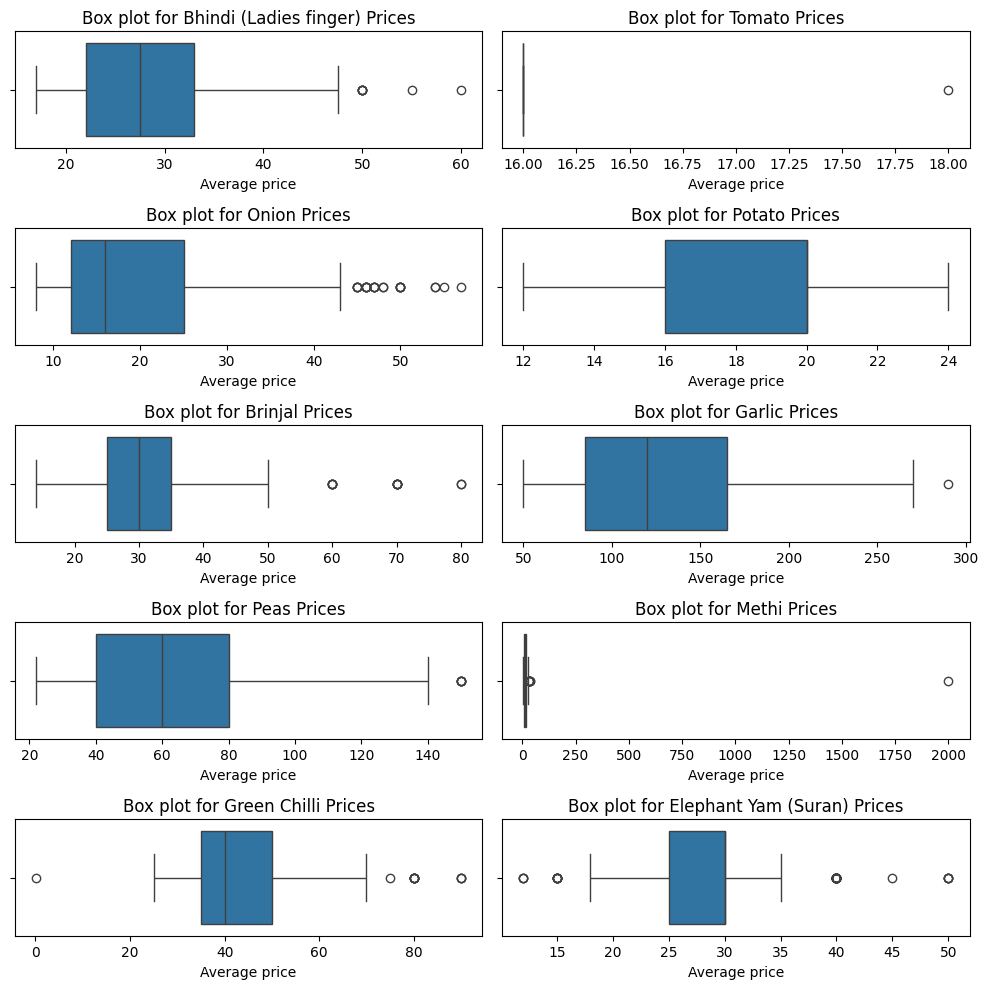

In [28]:
import math
# Melt the dataframe
df_melted = pd.melt(quarter_preformance, id_vars=['quarter'], var_name='Vegetable', value_name='Average Price')

# Get unique vegetables
vegetables = df_melted['Vegetable'].unique()

num_rows = 5  # Fixed number of rows
num_cols = math.ceil(len(vegetables) / num_rows) #Calculate columns based on number of vegetables and rows


# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10)) 
axes = axes.flatten()
# Iterate and plot
for i, vegetable in enumerate(vegetables):
    sn.boxplot(data=df_melted[df_melted['Vegetable'] == vegetable], x='Average Price', ax=axes[i])
    axes[i].set_title(f'Box plot for {vegetable} Prices')
    axes[i].set_xlabel('Average price')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

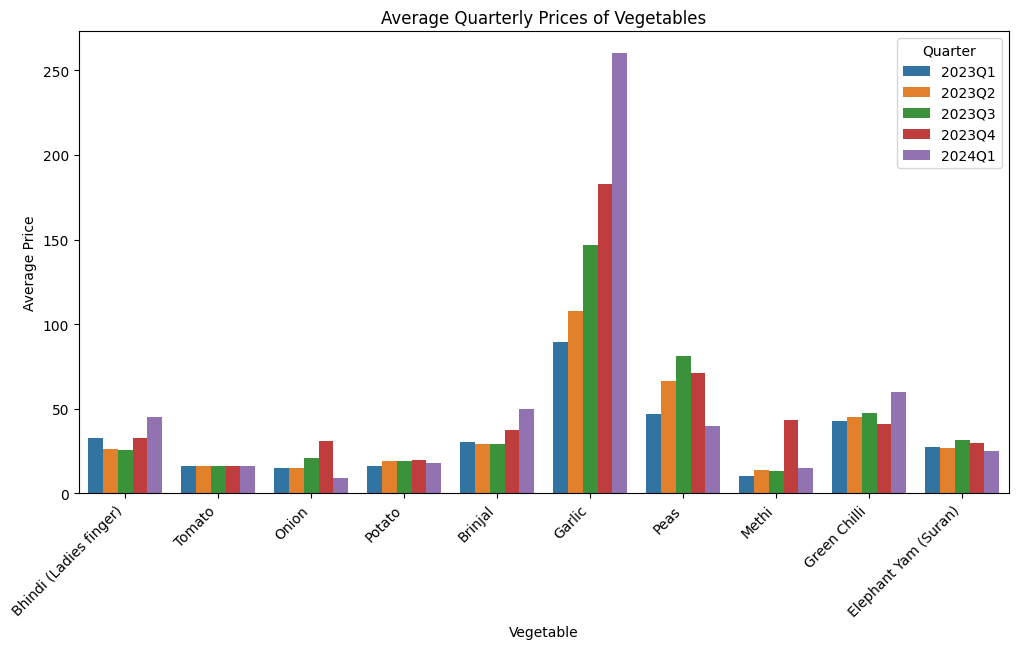

In [29]:

# Create the grouped bar graph using Seaborn
plt.figure(figsize=(12, 6))
sn.barplot(x='Vegetable', y='Average Price', hue='quarter', data=df_melted, errorbar=None)
plt.xlabel("Vegetable")
plt.ylabel("Average Price")
plt.title("Average Quarterly Prices of Vegetables")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.legend(title='Quarter')
plt.show()

Having Gatherd all the finding we have we can make the following hypotheses regarding the current vegetable prices:

1) Tomatos have kept a constant price meaing the demand never exceeded the supply and since they are grown globally in warm and sunny environments.
they can be planted in abundance.
2) Garlic, has had a rapid incline in prices, this may be due to exportation issues from its majour exporters Argentina and Spain in the period of 2023.
3) Peas had a major surge in the third quarter in the year 2023, 